In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/21_3, MCD.csv'
filename_clean = '../csv_detection_info_clean/21_3, MCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/21/3, MCD'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.12307237.73839776.dcm,1117,1286,840,1009,0.999965,21,3,"3, MCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.12307239.162936734...,392,558,763,929,0.999930,21,3,"3, MCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.15181.20210902.133702.0.0.dcm,544,697,478,631,0.999994,21,3,"3, MCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.15181.20210902.134026.0.0.dcm,492,645,1001,1154,0.999989,21,3,"3, MCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20210527.133437.0.dcm,1146,1299,1510,1663,0.998751,21,3,"3, MCD"
...,...,...,...,...,...,...,...,...,...,...
64,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.36826025.20045.12866.40187.60156.40...,925,1038,792,905,0.999614,21,3,"3, MCD"
65,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3698557092.11551.36426.37336.33132....,533,682,1077,1226,0.999995,21,3,"3, MCD"
66,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4143900602.7372.41030.44992.29037.3...,1115,1347,570,803,0.993753,21,3,"3, MCD"
67,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.601706989.4599.10564.40847.45527.40...,547,702,483,638,0.479550,21,3,"3, MCD"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([9, 21, 26, 27, 67], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

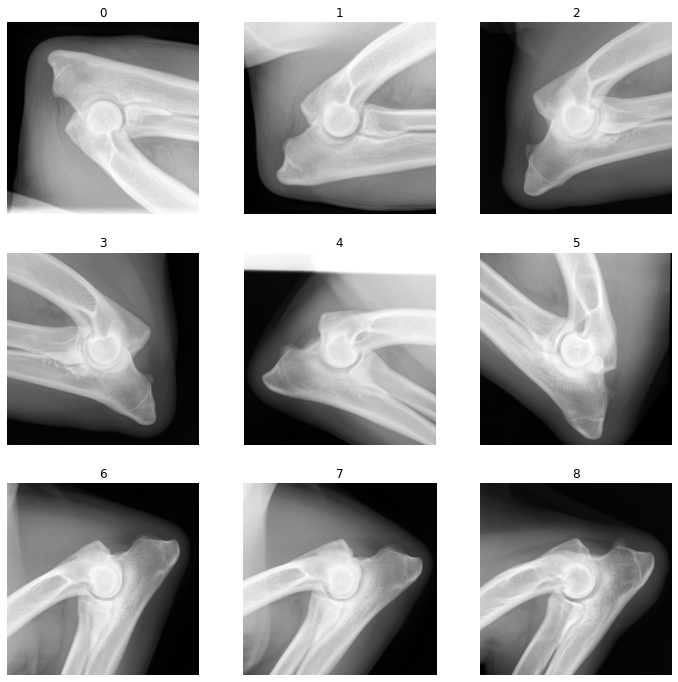

C:\NMBU\TEMP\ipykernel_3584\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_3584\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


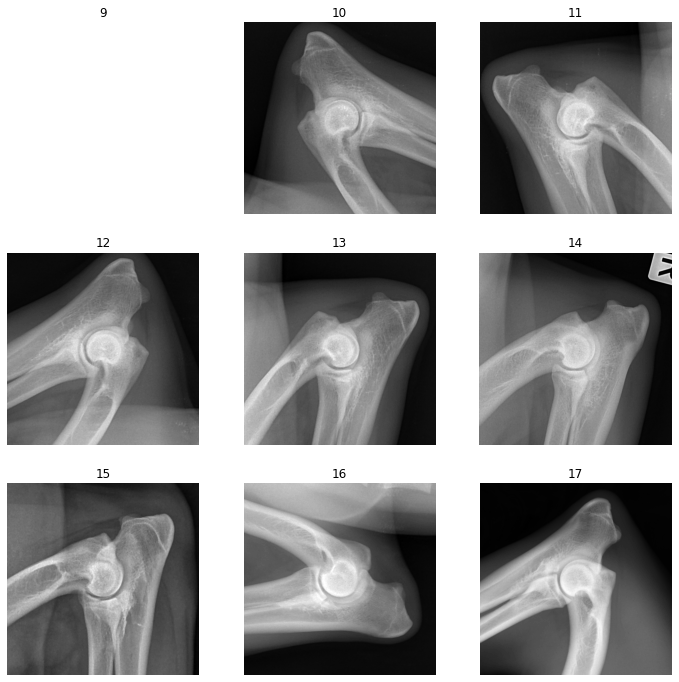

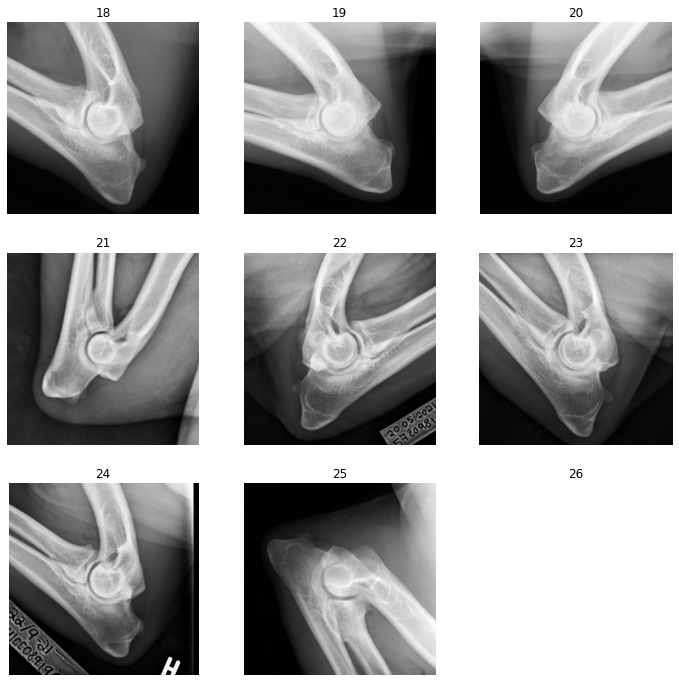

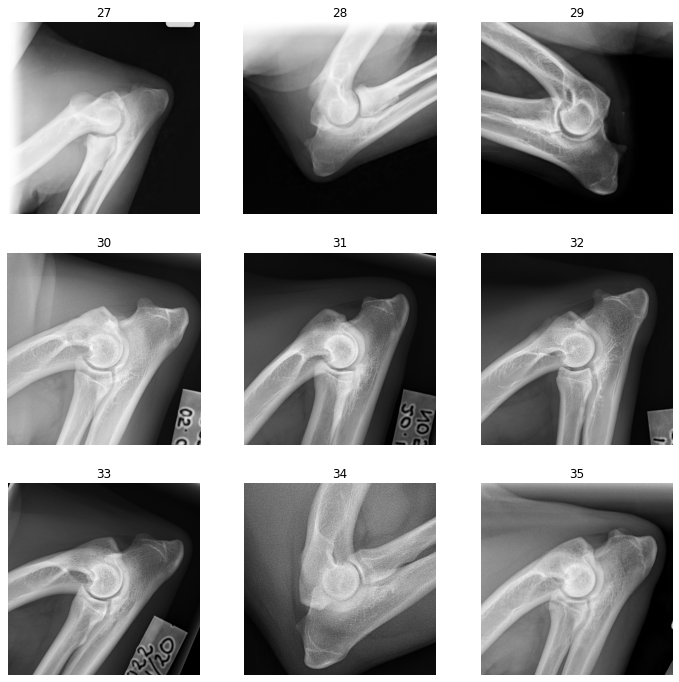

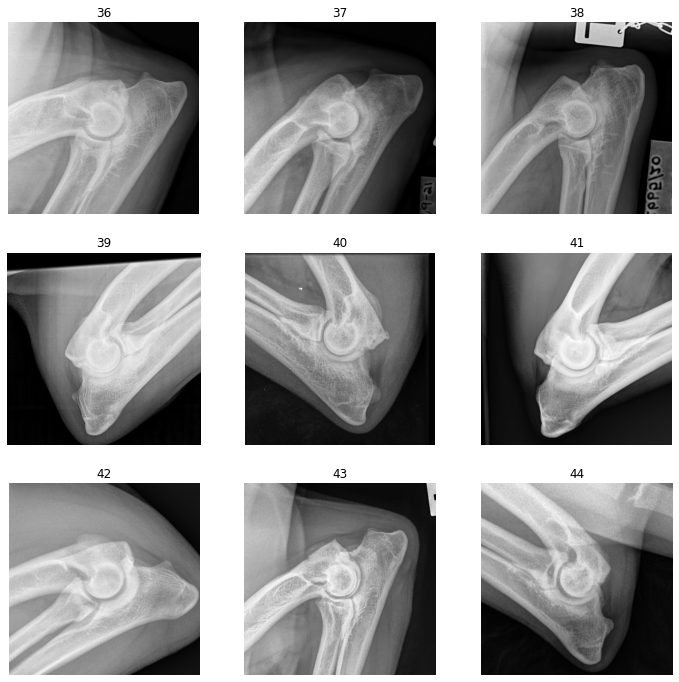

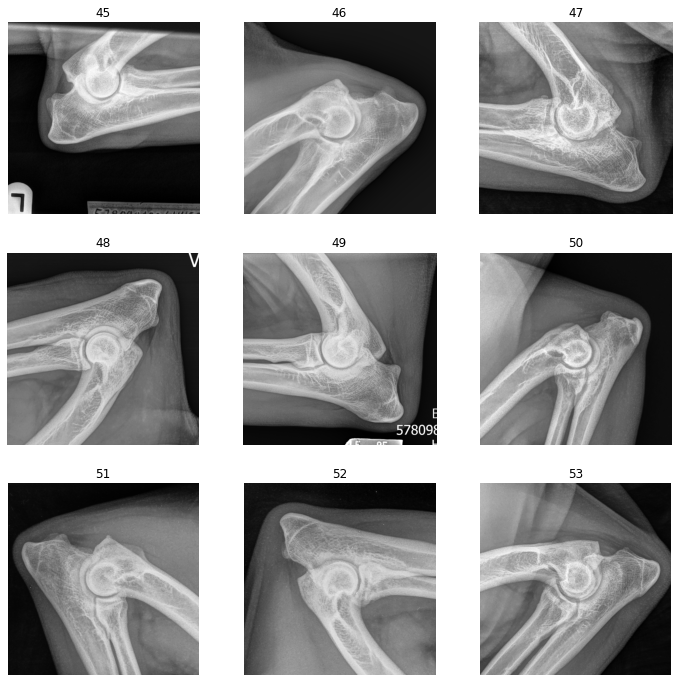

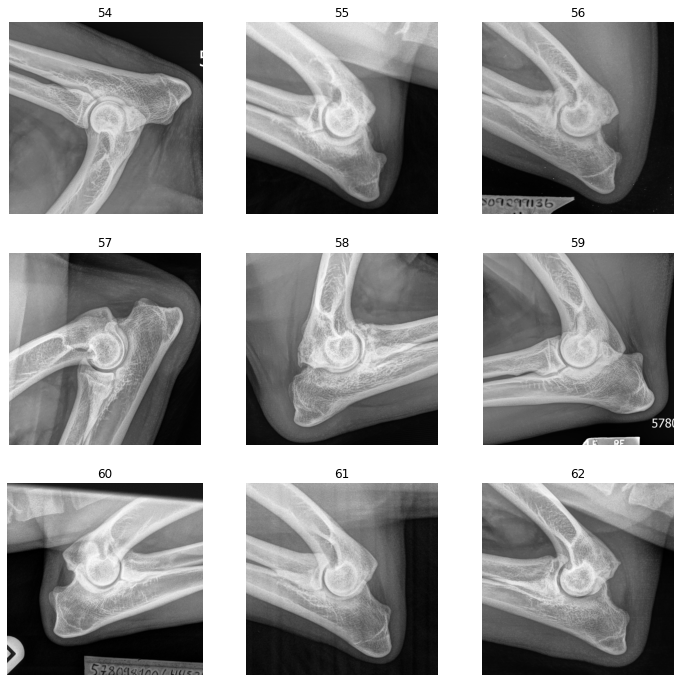

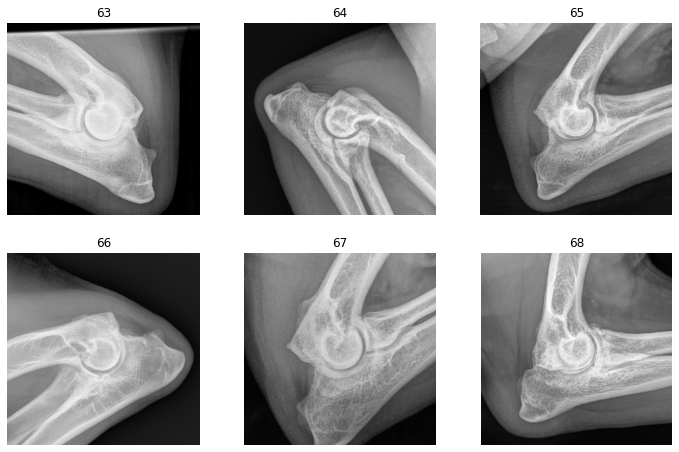

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [9, 26]
detection_df[~detection_df.index.isin(remove_indice)]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.12307237.73839776.dcm,1117,1286,840,1009,0.999965,21,3,"3, MCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.12307239.162936734...,392,558,763,929,0.999930,21,3,"3, MCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.15181.20210902.133702.0.0.dcm,544,697,478,631,0.999994,21,3,"3, MCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.15181.20210902.134026.0.0.dcm,492,645,1001,1154,0.999989,21,3,"3, MCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20210527.133437.0.dcm,1146,1299,1510,1663,0.998751,21,3,"3, MCD"
...,...,...,...,...,...,...,...,...,...,...
64,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.36826025.20045.12866.40187.60156.40...,925,1038,792,905,0.999614,21,3,"3, MCD"
65,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3698557092.11551.36426.37336.33132....,533,682,1077,1226,0.999995,21,3,"3, MCD"
66,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4143900602.7372.41030.44992.29037.3...,1115,1347,570,803,0.993753,21,3,"3, MCD"
67,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.601706989.4599.10564.40847.45527.40...,547,702,483,638,0.479550,21,3,"3, MCD"


In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)